# 1. Linear Regresssion PyTorch 로 구현하기 

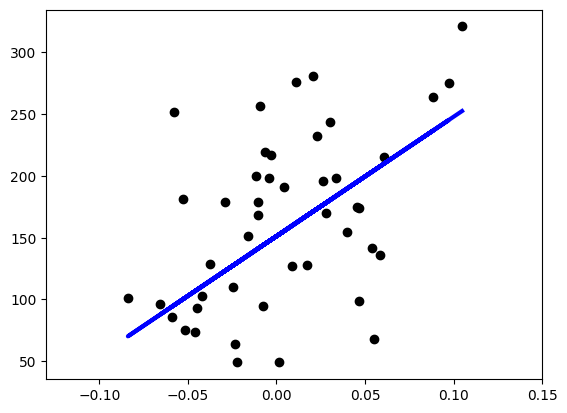

In [1]:
import matplotlib.pylab as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# 당뇨병 데이터 세트를 적재한다. 
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# 하나의 특징(BMI)만 추려내서 2차원 배열로 만든다. BMI 특징의 인덱스가 2이다.
diabetes_X_new = diabetes_X[:, np.newaxis, 2]

# 학습 데이터와 테스트 데이터를 분리한다. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X_new, diabetes_y, test_size=0.1, random_state=0)
regr = LinearRegression()
regr.fit(X_train, y_train)

# 테스트 데이터로 예측해보자. 
y_pred = regr.predict(X_test) 

# 실제 데이터와 예측 데이터를 비교해보자. 
plt.plot(y_test, y_pred, '.')
plt.xlim([-0.13,0.15])
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.show()


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

2) 변수 선언

In [3]:
# y=2x
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

3) 가중치와 편향의 초기화

In [4]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시함.
W = torch.zeros(1, requires_grad=True) 
# 가중치 W를 출력
print(W) 
# 편향 도 0으로 초기화
b = torch.zeros(1, requires_grad=True)
# 가중치 W를 출력
print(b) 

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


4) 가설 세우기

In [5]:

hypothesis = x_train * W + b
print(hypothesis)


tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


5) 비용 함수 선언하기

In [6]:
# 앞서 배운 torch.mean으로 평균을 구한다. MSE
cost = torch.mean((hypothesis - y_train) ** 2) 
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


6) 경사 하강법 구현하기

In [90]:
optimizer = optim.SGD([W, b], lr=0.01)

Torch 전체 코드

In [8]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 2999 # 원하는만큼 경사 하강법을 반복
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    hypothesis = x_train * W + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/2999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/2999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/2999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/2999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/2999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/2999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/2999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/2999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/2999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/2999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/2999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/2999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/2999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/2999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/2999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/2999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/2999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/2999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/2999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/2999 W: 1.997, b: 0.008 Cost: 0.000008

# 2. Linear Regression with sklearn 로 구현하기

In [9]:
from sklearn import datasets
from sklearn import linear_model

boston_house_prices = datasets.load_boston()

# 로드한 boston 전체 데이터에 key 값을 출력
print(boston_house_prices.keys())
# boston 전체 데이터 중 data에 대한 전체 행, 열 길이를 출력
print(boston_house_prices.data.shape)
# boston 데이터에 컬럼 이름을 출력 
print(boston_house_prices.feature_names)
print(boston_house_prices.DESCR)


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [93]:
boston_house_prices.data[:,5].shape

(506,)

(506, 1) (506,)


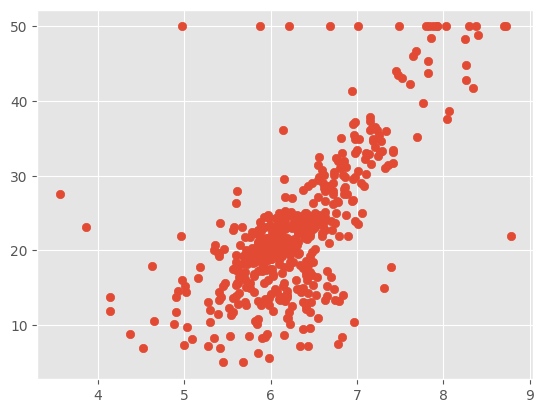

In [94]:
import matplotlib.pylab as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
X = boston_house_prices.data[:,5];  #average number of rooms per dwelling
X = X[:, np.newaxis]
y = boston_house_prices.target
plt.scatter(X,y )
print(X.shape, y.shape)



In [95]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X, y)
prediction = linear_regression.predict(X)
print('a value: ', linear_regression.intercept_)
print('b value: ',linear_regression.coef_)


a value:  -34.67062077643851
b value:  [9.10210898]


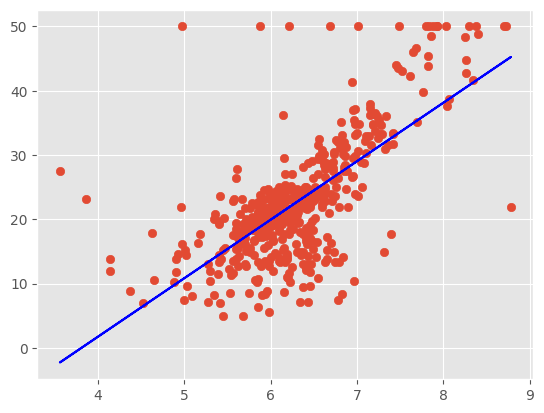

In [99]:
plt.scatter(X,y )
plt.plot(X,prediction,'b' )

# 3. Brest Cancer Logistic Regression with sklearn

In [10]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
cancer_ds = datasets.load_breast_cancer()
cancer_ds.data.shape
cancer_ds.target_names

array(['malignant', 'benign'], dtype='<U9')

In [11]:
clf = LogisticRegression(multi_class = 'ovr', solver='liblinear')  #one-vs-rest (OvR)
clf.fit(cancer_ds.data , cancer_ds.target)

LogisticRegression(multi_class='ovr', solver='liblinear')

참고 (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

In [21]:
print(cancer_ds.target)
clf.predict(cancer_ds.data)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [12]:
clf.score(cancer_ds.data, cancer_ds.target)

0.9595782073813708

In [13]:
import pandas as pd
from sklearn import datasets
# 0 : 양성, 1 : 악성
from sklearn.linear_model import LogisticRegression
cancer_ds = datasets.load_breast_cancer()

clf = LogisticRegression(multi_class = 'ovr', solver='liblinear') #one-vs-rest (OvR)
clf.fit(cancer_ds.data , cancer_ds.target)
clf.predict(cancer_ds.data)- cancer_ds.target

clf.score(cancer_ds.data, cancer_ds.target)


0.9595782073813708

## Logistic Regression Torch

In [14]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.model_selection import train_test_split  # for train/test split

# Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(f'number of samples: {n_samples}, number of features: {n_features}')

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train.data[1,1]

number of samples: 569, number of features: 30


22.44

In [15]:
# scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train.data[1,1]

0.7156060425145732

### Prepare data

In [16]:
# scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# convert to tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# reshape y tensors
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

### Prepare Model

In [17]:
# Create model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted
    
model = LogisticRegression(n_features)

### Prepare Loss and Optimizer

In [18]:

# Loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


### Training Loop

In [19]:

# training loop
num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X_train)
    loss = criterion(y_predicted, y_train)
    
    # backward pass
    loss.backward()
    
    # updates
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 0.4312
epoch: 20, loss = 0.3889
epoch: 30, loss = 0.3565
epoch: 40, loss = 0.3307
epoch: 50, loss = 0.3096
epoch: 60, loss = 0.2919
epoch: 70, loss = 0.2768
epoch: 80, loss = 0.2638
epoch: 90, loss = 0.2523
epoch: 100, loss = 0.2421
